In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report

import warnings
warnings.filterwarnings('ignore')

In [7]:
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


In [2]:
data = pd.read_csv('forestfires.csv')
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.isna().any()

month            False
day              False
FFMC             False
DMC              False
DC               False
ISI              False
temp             False
RH               False
wind             False
rain             False
area             False
dayfri           False
daymon           False
daysat           False
daysun           False
daythu           False
daytue           False
daywed           False
monthapr         False
monthaug         False
monthdec         False
monthfeb         False
monthjan         False
monthjul         False
monthjun         False
monthmar         False
monthmay         False
monthnov         False
monthoct         False
monthsep         False
size_category    False
dtype: bool

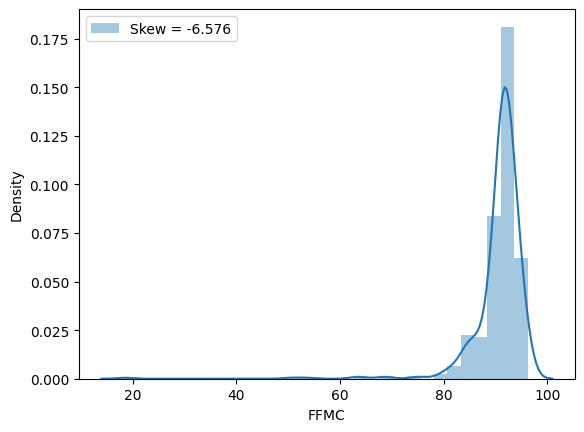

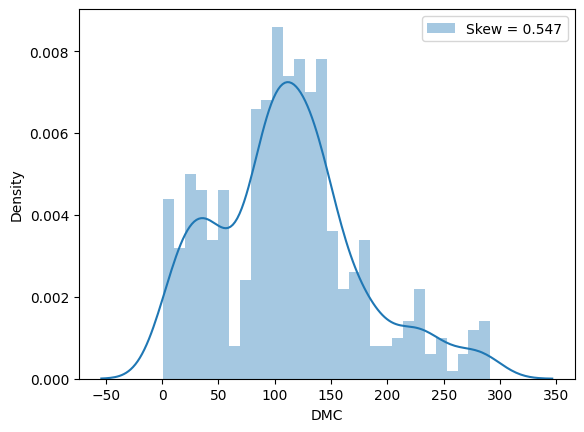

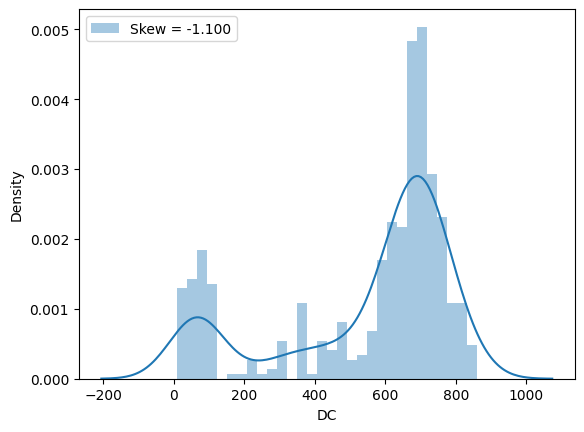

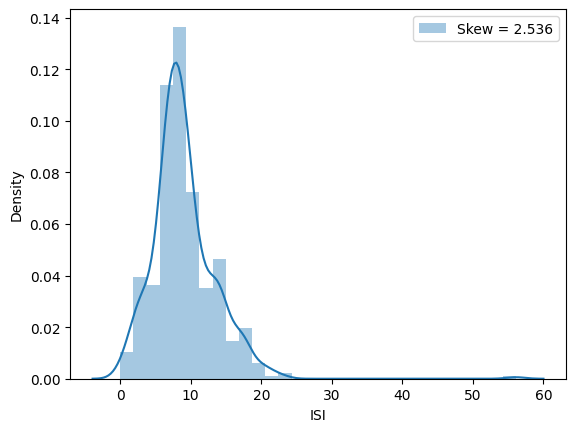

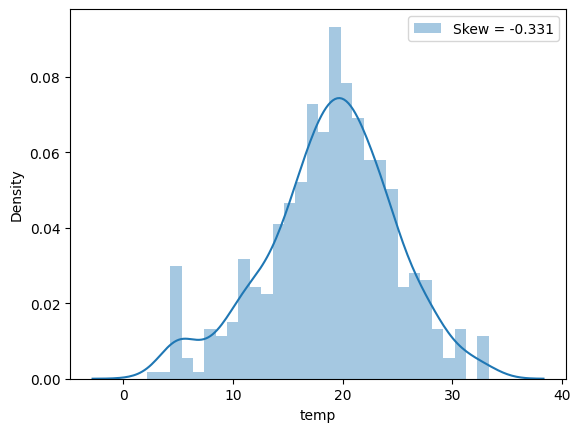

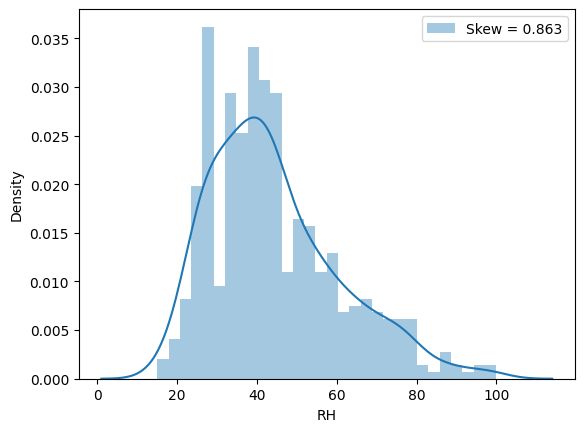

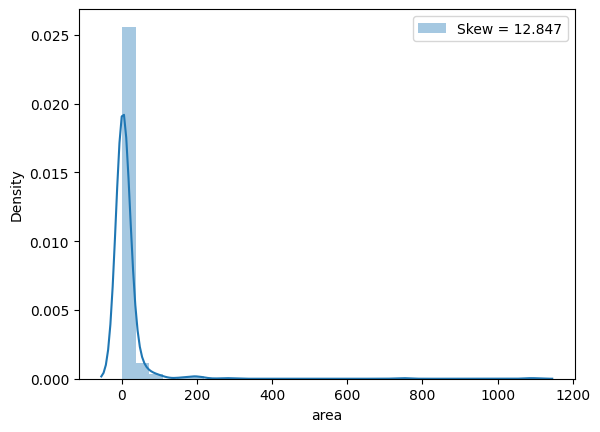

In [168]:
numerical_features=[feature for feature in data.columns if data[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25]
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
for feat in continuous_feature:
    skew = data[feat].skew()
    sns.distplot(data[feat], kde= True, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


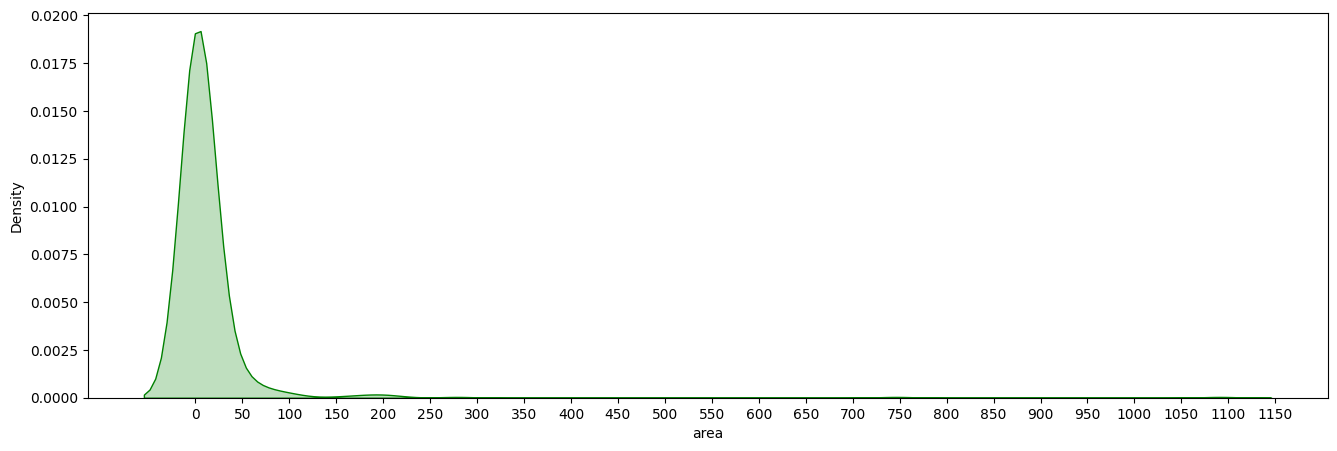

In [167]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(data['area'].skew()))
print("Kurtosis: {}".format(data['area'].kurtosis()))
ax = sns.kdeplot(data['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

In [6]:
data1 = data.iloc[:,0:11]
data1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [7]:
forest = pd.concat([data1, data['size_category']], axis = 1)
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


<Axes: xlabel='count', ylabel='month'>

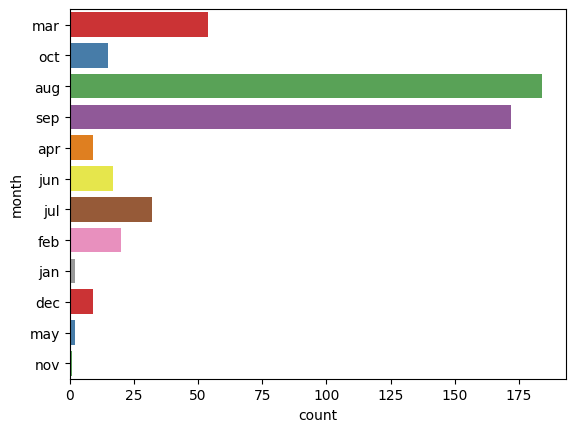

In [8]:
sns.countplot(data['month'], palette="Set1")

In [9]:
size_map = {"small":0, "large":1}
forest["size_category"] = forest["size_category"].map(size_map)
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0


In [10]:
le = LabelEncoder()
forest['month']= le.fit_transform(forest['month'])
forest['day']= le.fit_transform(forest['day'])
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0


Visualization

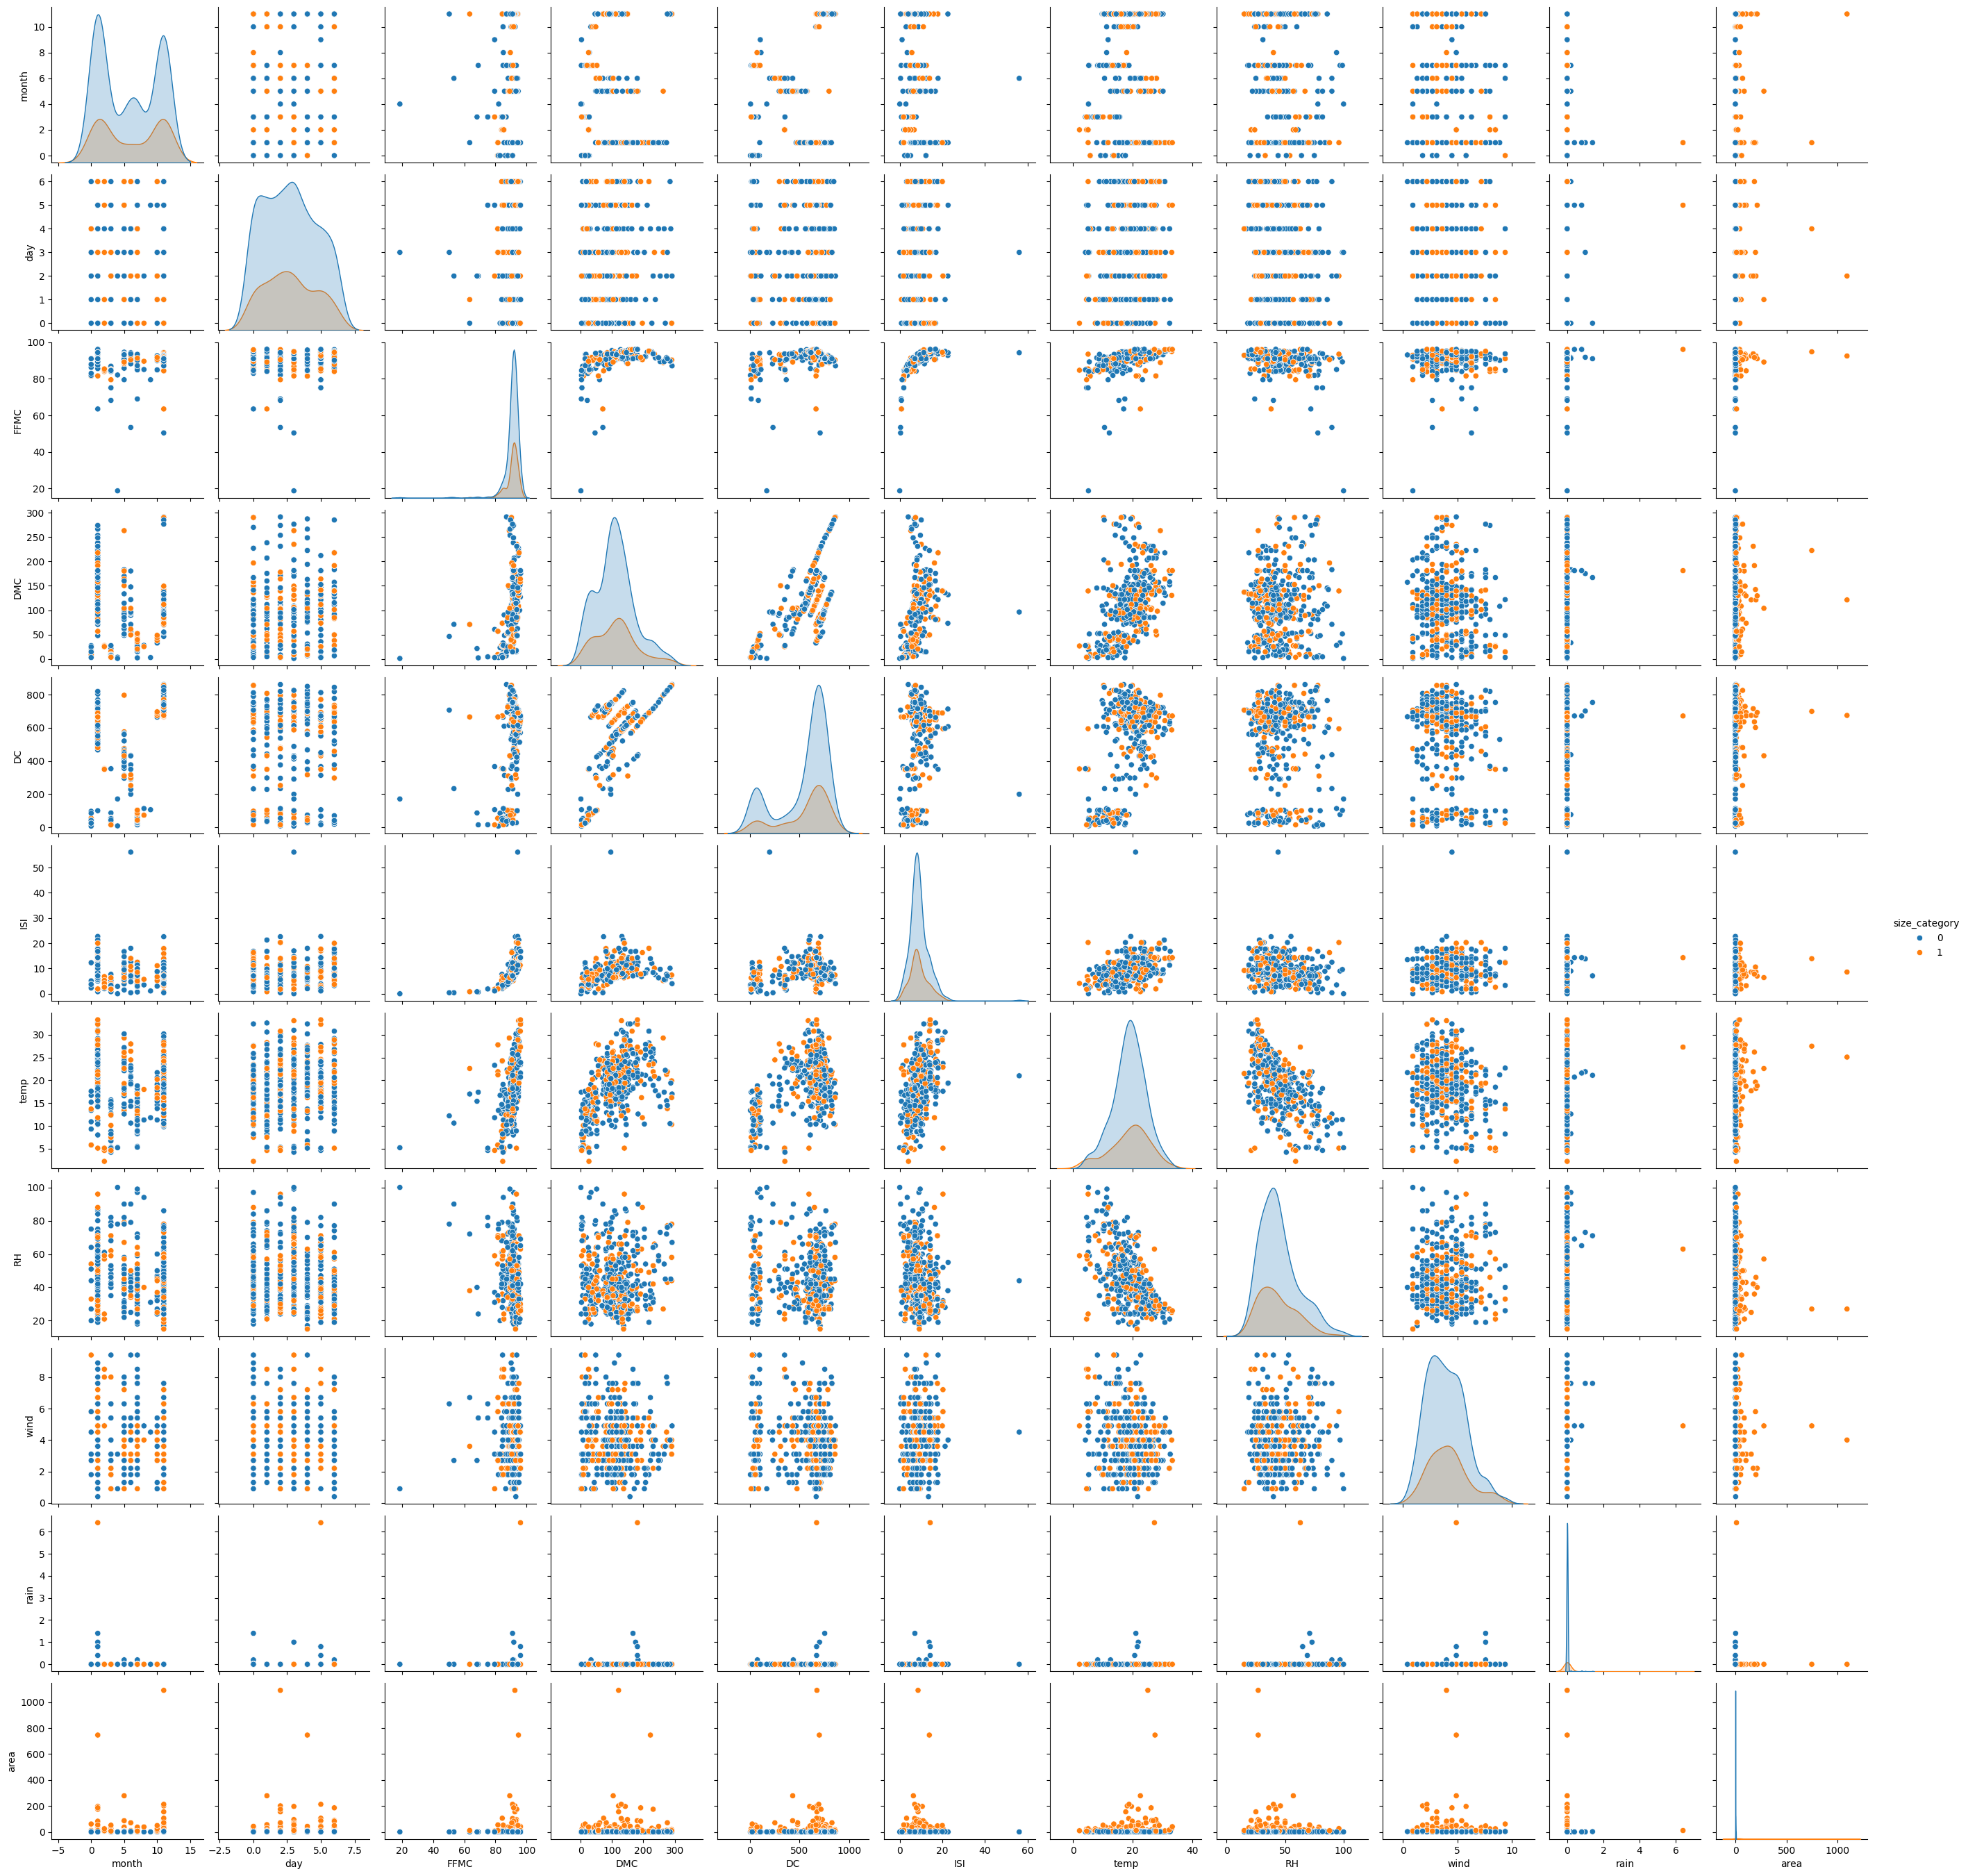

In [12]:
sns.pairplot(forest, hue='size_category')

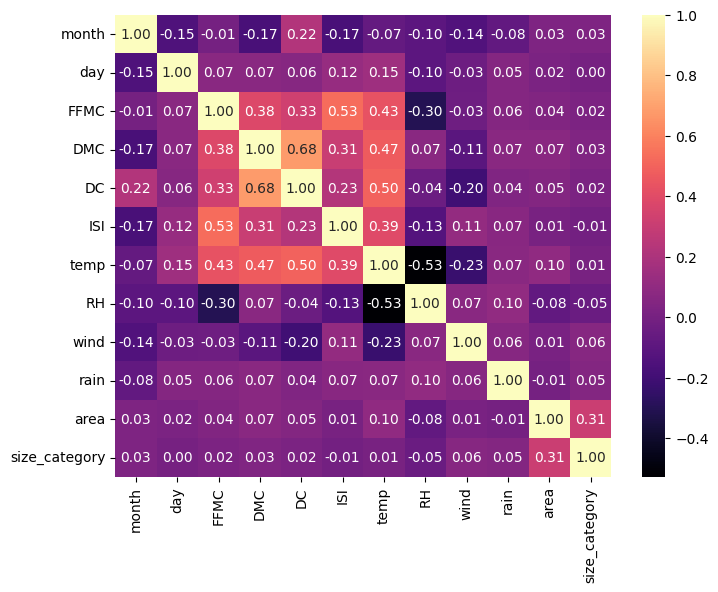

In [13]:
plt.figure(figsize = (8, 6));
sns.heatmap(forest.corr(), cmap='magma', annot=True, fmt=".2f")
plt.show()

### Neural Network

In [11]:
np.random.seed(7)

x = forest.iloc[:,:-1]
y = forest.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3, stratify=y)
print(x.shape)
print(y.shape)

(517, 11)
(517,)


In [12]:
model = Sequential()
model.add(Dense(14, input_dim = 11,activation = 'relu'))
model.add(Dense(11, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=["accuracy"])

In [17]:
# Fit the model
history = model.fit(x, y, validation_split=0.33, epochs=200, batch_size=10)

Epoch 1/200
35/35 [==============================] - 1s 9ms/step - loss: 3.3981 - accuracy: 0.7139 - val_loss: 3.0769 - val_accuracy: 0.5380
Epoch 2/200
35/35 [==============================] - 0s 4ms/step - loss: 1.5057 - accuracy: 0.7514 - val_loss: 1.8951 - val_accuracy: 0.7602
Epoch 3/200
35/35 [==============================] - 0s 3ms/step - loss: 1.2450 - accuracy: 0.8064 - val_loss: 0.9728 - val_accuracy: 0.6842
Epoch 4/200
35/35 [==============================] - 0s 4ms/step - loss: 0.8115 - accuracy: 0.8324 - val_loss: 0.4881 - val_accuracy: 0.8129
Epoch 5/200
35/35 [==============================] - 0s 4ms/step - loss: 0.7676 - accuracy: 0.7919 - val_loss: 1.2306 - val_accuracy: 0.5906
Epoch 6/200
35/35 [==============================] - 0s 4ms/step - loss: 0.4361 - accuracy: 0.8728 - val_loss: 0.2697 - val_accuracy: 0.9064
Epoch 7/200
35/35 [==============================] - 0s 3ms/step - loss: 0.2927 - accuracy: 0.9104 - val_loss: 0.2134 - val_accuracy: 0.9240
Epoch 8/200
3

In [18]:
# evaluate the model
scores = model.evaluate(x, y)
print((model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.0327 - accuracy: 0.9865
('accuracy', 98.64603281021118)


In [19]:
model.metrics_names

['loss', 'accuracy']

In [19]:
scores

[0.08775705099105835, 0.9690521955490112]

In [20]:
# list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

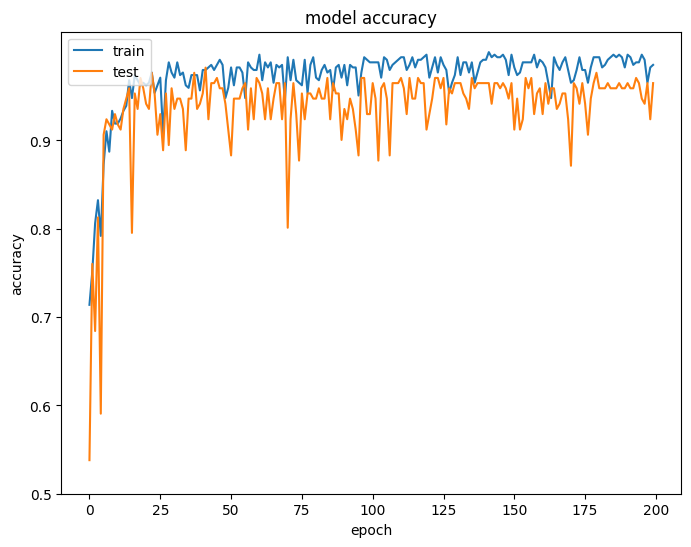

In [21]:
# summarize history for accuracy
plt.figure(figsize = (8,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.yticks(np.arange(0.5, 1, step=0.1))
plt.legend(['train', 'test'], loc='upper left')
plt.show()

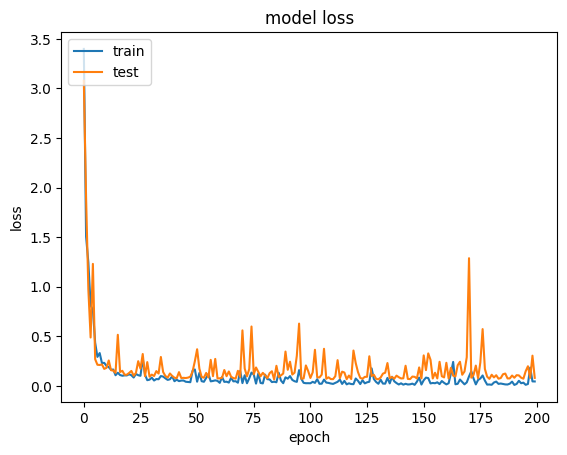

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Neural Network Hyper-Parameter
### Epochs and Batch_size

In [13]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(14,input_dim=11, activation='relu'))
    model1.add(Dense(11,activation='relu'))
    model1.add(Dense(1,activation='sigmoid'))

    adam=Adam(learning_rate=0.01)
    model1.compile(optimizer = 'adam', loss='binary_crossentropy',metrics=["accuracy"])
    return model1

In [14]:
len(x_train.columns)

11

In [23]:
model1 = KerasClassifier(build_fn=create_model,verbose=0)
batch_size = [10,20,40,50]
epochs = [10,50,100,200]
param_grid = dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result = grid.fit(x_test,y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END ....batch_size=10, epochs=10;, score=0.688 total time=   1.3s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END ....batch_size=10, epochs=10;, score=0.903 total time=   1.3s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END ....batch_size=10, epochs=10;, score=0.903 total time=   1.3s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END ....batch_size=10, epochs=10;, score=0.677 total time=   1.3s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END ....batch_size=10, epochs=10;, score=0.710 total time=   1.8s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................
[CV 1/5; 2/16] END ....batch_size=10, epochs=50;

[CV 3/5; 5/16] END ....batch_size=20, epochs=10;, score=0.710 total time=   1.5s
[CV 4/5; 5/16] START batch_size=20, epochs=10...................................


[CV 4/5; 5/16] END ....batch_size=20, epochs=10;, score=0.677 total time=   1.1s
[CV 5/5; 5/16] START batch_size=20, epochs=10...................................
[CV 5/5; 5/16] END ....batch_size=20, epochs=10;, score=0.484 total time=   1.1s
[CV 1/5; 6/16] START batch_size=20, epochs=50...................................
[CV 1/5; 6/16] END ....batch_size=20, epochs=50;, score=0.875 total time=   1.6s
[CV 2/5; 6/16] START batch_size=20, epochs=50...................................
[CV 2/5; 6/16] END ....batch_size=20, epochs=50;, score=0.871 total time=   2.3s
[CV 3/5; 6/16] START batch_size=20, epochs=50...................................
[CV 3/5; 6/16] END ....batch_size=20, epochs=50;, score=0.806 total time=   1.6s
[CV 4/5; 6/16] START batch_size=20, epochs=50...................................
[CV 4/5; 6/16] END ....batch_size=20, epochs=50;, score=0.871 total time=   1.6s
[CV 5/5; 6/16] START batch_size=20, epochs=50...................................
[CV 5/5; 6/16] END ....batch

In [24]:
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.942741935483871, using {'batch_size': 10, 'epochs': 200}
0.7762096774193548,0.10423211610178097 with {'batch_size': 10, 'epochs': 10}
0.8215725806451614,0.12541878339342805 with {'batch_size': 10, 'epochs': 50}
0.9098790322580645,0.043069726034982006 with {'batch_size': 10, 'epochs': 100}
0.942741935483871,0.05051761213988976 with {'batch_size': 10, 'epochs': 200}
0.6673387096774194,0.14296046694545028 with {'batch_size': 20, 'epochs': 10}
0.8653225806451614,0.03181142406986456 with {'batch_size': 20, 'epochs': 50}
0.8467741935483872,0.059916695551634536 with {'batch_size': 20, 'epochs': 100}
0.9362903225806452,0.04449391685204427 with {'batch_size': 20, 'epochs': 200}
0.5518145161290323,0.14500944118676773 with {'batch_size': 40, 'epochs': 10}
0.7177419354838709,0.12842599507996377 with {'batch_size': 40, 'epochs': 50}
0.8272177419354838,0.06537856024292737 with {'batch_size': 40, 'epochs': 100}
0.9036290322580646,0.029310938460300386 with {'batch_size': 40, 'epochs': 200}
0.41

## Optimal Dropout_Rate

In [96]:
def create_model(dropout_rate=0.0,learning_rate=0.0):
    model2 = Sequential()
    model2.add(Dense(11,input_dim=11,kernel_initializer='uniform',activation='relu'))
    model2.add(Dropout(dropout_rate))
    model2.add(Dense(14,kernel_initializer='uniform',activation='relu'))
    model2.add(Dropout(dropout_rate))
    model2.add(Dense(1,kernel_initializer='uniform',activation="sigmoid"))

    adam=Adam(learning_rate=learning_rate)
    model2.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model2

In [107]:
learning_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0,0.1,0.2]

In [108]:
model2=KerasClassifier(model=create_model,batch_size=10,epochs=200,verbose=0,optimizer = 'adam')
param_grid=dict(model__dropout_rate=dropout_rate,optimizer__learning_rate = learning_rate)
grid2 = GridSearchCV(estimator=model2,param_grid=param_grid,cv=KFold(),verbose=10)

In [109]:
grid_result2 = grid2.fit(x_test,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START model__dropout_rate=0.0, optimizer__learning_rate=0.001.....
[CV 1/5; 1/9] END model__dropout_rate=0.0, optimizer__learning_rate=0.001;, score=0.688 total time=   6.2s
[CV 2/5; 1/9] START model__dropout_rate=0.0, optimizer__learning_rate=0.001.....
[CV 2/5; 1/9] END model__dropout_rate=0.0, optimizer__learning_rate=0.001;, score=0.097 total time=   6.2s
[CV 3/5; 1/9] START model__dropout_rate=0.0, optimizer__learning_rate=0.001.....
[CV 3/5; 1/9] END model__dropout_rate=0.0, optimizer__learning_rate=0.001;, score=0.323 total time=   6.1s
[CV 4/5; 1/9] START model__dropout_rate=0.0, optimizer__learning_rate=0.001.....
[CV 4/5; 1/9] END model__dropout_rate=0.0, optimizer__learning_rate=0.001;, score=0.710 total time=  11.2s
[CV 5/5; 1/9] START model__dropout_rate=0.0, optimizer__learning_rate=0.001.....
[CV 5/5; 1/9] END model__dropout_rate=0.0, optimizer__learning_rate=0.001;, score=0.290 total time=   6.2s


In [117]:
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
means2 = grid_result2.cv_results_['mean_test_score']
stds2 = grid_result2.cv_results_['std_test_score']
params2 = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means2, stds2, params2):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.582661 using {'model__dropout_rate': 0.1, 'optimizer__learning_rate': 0.01}
0.421371 (0.239266) with: {'model__dropout_rate': 0.0, 'optimizer__learning_rate': 0.001}
0.473387 (0.223775) with: {'model__dropout_rate': 0.0, 'optimizer__learning_rate': 0.01}
0.578629 (0.230404) with: {'model__dropout_rate': 0.0, 'optimizer__learning_rate': 0.1}
0.436492 (0.194129) with: {'model__dropout_rate': 0.1, 'optimizer__learning_rate': 0.001}
0.582661 (0.191360) with: {'model__dropout_rate': 0.1, 'optimizer__learning_rate': 0.01}
0.449597 (0.132673) with: {'model__dropout_rate': 0.1, 'optimizer__learning_rate': 0.1}
0.532056 (0.220207) with: {'model__dropout_rate': 0.2, 'optimizer__learning_rate': 0.001}
0.556855 (0.213612) with: {'model__dropout_rate': 0.2, 'optimizer__learning_rate': 0.01}
0.576008 (0.130017) with: {'model__dropout_rate': 0.2, 'optimizer__learning_rate': 0.1}


Best score is with Dropout_rate = [0.0,0.2] Learning_rate = [0.1,0.001]

Score of 83%

### Activation Function and Kernel Initializer

In [126]:
def create_model(activation='relu',init_mode='uniform'):
    model3 = Sequential()
    model3.add(Dense(11,input_dim = 11,kernel_initializer = init_mode,activation = activation))
    model3.add(Dropout(0.2))
    model3.add(Dense(14,input_dim = 11,kernel_initializer = init_mode,activation = activation))
    model3.add(Dropout(0.2))
    model3.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = 0.001)
    model3.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    return model3

In [133]:
model3 = KerasClassifier(model = create_model,verbose = 0,batch_size = 10,epochs = 200, optimizer='adam')

In [134]:
activation = ['softmax', 'relu', 'tanh', 'linear']
init_mode = ['uniform', 'normal', 'zero']

# Make a dictionary of the grid search parameters
param_grids = dict(model__activation = activation, model__init_mode = init_mode)

In [135]:
grid3 = GridSearchCV(estimator = model3,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result3 = grid3.fit(x_test,y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START model__activation=softmax, model__init_mode=uniform........
[CV 1/5; 1/12] END model__activation=softmax, model__init_mode=uniform;, score=0.875 total time=   6.8s
[CV 2/5; 1/12] START model__activation=softmax, model__init_mode=uniform........
[CV 2/5; 1/12] END model__activation=softmax, model__init_mode=uniform;, score=0.968 total time=   6.2s
[CV 3/5; 1/12] START model__activation=softmax, model__init_mode=uniform........
[CV 3/5; 1/12] END model__activation=softmax, model__init_mode=uniform;, score=0.968 total time=   6.6s
[CV 4/5; 1/12] START model__activation=softmax, model__init_mode=uniform........
[CV 4/5; 1/12] END model__activation=softmax, model__init_mode=uniform;, score=1.000 total time=   5.6s
[CV 5/5; 1/12] START model__activation=softmax, model__init_mode=uniform........
[CV 5/5; 1/12] END model__activation=softmax, model__init_mode=uniform;, score=0.968 total time=   6.3s
[CV 1/5; 2/12]

In [137]:
print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))
means3 = grid_result3.cv_results_['mean_test_score']
stds3 = grid_result3.cv_results_['std_test_score']
params3 = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means3, stds3, params3):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.974597 using {'model__activation': 'linear', 'model__init_mode': 'uniform'}
0.955645 (0.042214) with: {'model__activation': 'softmax', 'model__init_mode': 'uniform'}
0.922984 (0.109157) with: {'model__activation': 'softmax', 'model__init_mode': 'normal'}
0.935484 (0.113592) with: {'model__activation': 'softmax', 'model__init_mode': 'zero'}
0.967944 (0.020406) with: {'model__activation': 'relu', 'model__init_mode': 'uniform'}
0.942742 (0.050518) with: {'model__activation': 'relu', 'model__init_mode': 'normal'}
0.731048 (0.054512) with: {'model__activation': 'relu', 'model__init_mode': 'zero'}
0.974395 (0.037587) with: {'model__activation': 'tanh', 'model__init_mode': 'uniform'}
0.916734 (0.092522) with: {'model__activation': 'tanh', 'model__init_mode': 'normal'}
0.731048 (0.054512) with: {'model__activation': 'tanh', 'model__init_mode': 'zero'}
0.974597 (0.023498) with: {'model__activation': 'linear', 'model__init_mode': 'uniform'}
0.974597 (0.023498) with: {'model__activation':

Inference: The best score is 97.45 % , using 'activation_function': 'linear' as 'init': 'uniform'

## Number of Neurons

In [138]:
def create_model(neuron1,neuron2):
    model4 = Sequential()
    model4.add(Dense(neuron1,input_dim = 11,kernel_initializer = 'uniform',activation = 'linear'))
    model4.add(Dropout(0.2))
    model4.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'linear'))
    model4.add(Dropout(0.2))
    model4.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = 0.001)
    model4.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    return model4

In [139]:
model4 = KerasClassifier(model = create_model,verbose = 0,batch_size = 10,epochs = 200, optimizer='adam')

In [141]:
neuron1 = [4,8,11,16]
neuron2 = [2,4,8,14]
param_grids = dict(model__neuron1 = neuron1, model__neuron2 = neuron2)

In [142]:
grid4 = GridSearchCV(estimator = model4,param_grid = param_grids,cv = KFold(4),verbose = 10)
grid_result4 = grid4.fit(x_test,y_test)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV 1/4; 1/16] START model__neuron1=4, model__neuron2=2.........................
[CV 1/4; 1/16] END model__neuron1=4, model__neuron2=2;, score=0.949 total time=  12.2s
[CV 2/4; 1/16] START model__neuron1=4, model__neuron2=2.........................
[CV 2/4; 1/16] END model__neuron1=4, model__neuron2=2;, score=0.974 total time=   6.0s
[CV 3/4; 1/16] START model__neuron1=4, model__neuron2=2.........................
[CV 3/4; 1/16] END model__neuron1=4, model__neuron2=2;, score=0.974 total time=   5.5s
[CV 4/4; 1/16] START model__neuron1=4, model__neuron2=2.........................
[CV 4/4; 1/16] END model__neuron1=4, model__neuron2=2;, score=1.000 total time=   6.9s
[CV 1/4; 2/16] START model__neuron1=4, model__neuron2=4.........................
[CV 1/4; 2/16] END model__neuron1=4, model__neuron2=4;, score=0.949 total time=   5.5s
[CV 2/4; 2/16] START model__neuron1=4, model__neuron2=4.........................
[CV 2/4; 2/16] END

In [143]:
print("Best: %f using %s" % (grid_result4.best_score_, grid_result4.best_params_))
means4 = grid_result4.cv_results_['mean_test_score']
stds4 = grid_result4.cv_results_['std_test_score']
params4 = grid_result4.cv_results_['params']
for mean, stdev, param in zip(means4, stds4, params4):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.987179 using {'model__neuron1': 4, 'model__neuron2': 8}
0.974359 (0.018131) with: {'model__neuron1': 4, 'model__neuron2': 2}
0.967949 (0.021260) with: {'model__neuron1': 4, 'model__neuron2': 4}
0.987179 (0.012821) with: {'model__neuron1': 4, 'model__neuron2': 8}
0.974359 (0.018131) with: {'model__neuron1': 4, 'model__neuron2': 14}
0.974359 (0.031404) with: {'model__neuron1': 8, 'model__neuron2': 2}
0.974359 (0.018131) with: {'model__neuron1': 8, 'model__neuron2': 4}
0.967949 (0.027942) with: {'model__neuron1': 8, 'model__neuron2': 8}
0.974359 (0.018131) with: {'model__neuron1': 8, 'model__neuron2': 14}
0.967949 (0.027942) with: {'model__neuron1': 11, 'model__neuron2': 2}
0.980769 (0.011103) with: {'model__neuron1': 11, 'model__neuron2': 4}
0.955128 (0.033309) with: {'model__neuron1': 11, 'model__neuron2': 8}
0.967949 (0.033309) with: {'model__neuron1': 11, 'model__neuron2': 14}
0.967949 (0.027942) with: {'model__neuron1': 16, 'model__neuron2': 2}
0.961538 (0.038462) with: {'mod

Best score: 98.71 using {neuron1': 4, 'neuron2': 8}

### Creating Model with Best Parameters

In [152]:
 # create ANN model
model_final = Sequential()
# Defining the first layer of the model
model_final.add(Dense(4, input_dim=x_train.shape[1], kernel_initializer='uniform', activation='linear'))
model_final.add(Dropout(0.2))
# Defining the Second layer of the model
model_final.add(Dense(8, kernel_initializer='uniform', activation='linear'))
model_final.add(Dropout(0.2))
# The output neuron is a single fully connected node
# Since we will be predicting a single number
model_final.add(Dense(1,activation='sigmoid'))

model_final.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

# Training the model with best parameters
history = model_final.fit(x_train, y_train, validation_split=0.33, batch_size = 10, epochs = 200)

Epoch 1/200
25/25 [==============================] - 1s 10ms/step - loss: 0.6524 - accuracy: 0.6722 - val_loss: 0.6837 - val_accuracy: 0.6833
Epoch 2/200
25/25 [==============================] - 0s 4ms/step - loss: 0.5930 - accuracy: 0.7552 - val_loss: 0.6325 - val_accuracy: 0.6833
Epoch 3/200
25/25 [==============================] - 0s 5ms/step - loss: 0.5843 - accuracy: 0.7303 - val_loss: 0.6417 - val_accuracy: 0.6833
Epoch 4/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6123 - accuracy: 0.7303 - val_loss: 0.6229 - val_accuracy: 0.6833
Epoch 5/200
25/25 [==============================] - 0s 6ms/step - loss: 0.5816 - accuracy: 0.7510 - val_loss: 0.6152 - val_accuracy: 0.6833
Epoch 6/200
25/25 [==============================] - 0s 4ms/step - loss: 0.5609 - accuracy: 0.7676 - val_loss: 0.5917 - val_accuracy: 0.7083
Epoch 7/200
25/25 [==============================] - 0s 4ms/step - loss: 0.5199 - accuracy: 0.7759 - val_loss: 0.5905 - val_accuracy: 0.7083
Epoch 8/200


## Model Evaluation

In [153]:
# evaluate the model
scores = model_final.evaluate(x, y)
print("%s: %.2f%%" % (model_final.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.0850 - accuracy: 0.9749
accuracy: 97.49%


In [154]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

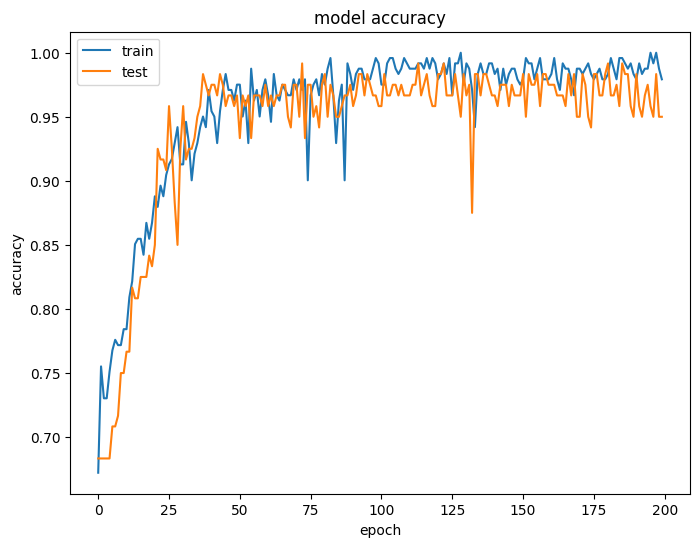

In [155]:
# summarize history for accuracy
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

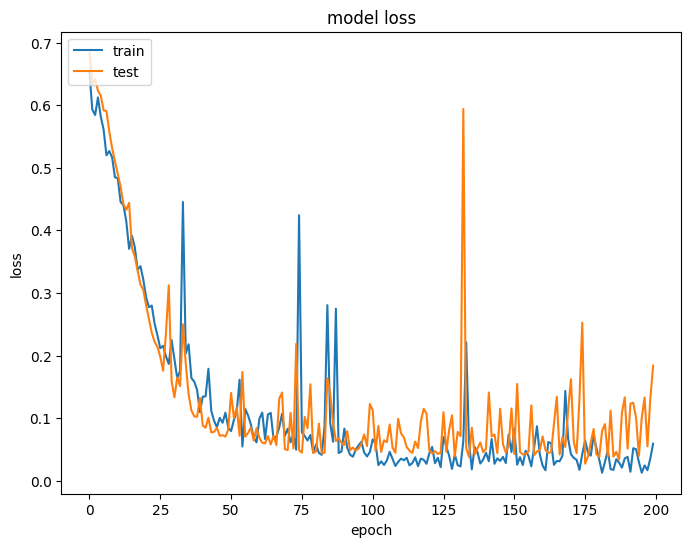

In [156]:
# summarize history for loss
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Predicting Values

In [162]:
# generating predictions for test data
y_predict_test = model_final.predict(x_test)

# creating table with test price & predicted price for test
test_prediction = pd.DataFrame()
test_prediction['Test_Actual'] = y_test
test_prediction['Test_Probability'] = y_predict_test
def probToBinary(varProb):
    if varProb >= 0.5:
        return 1
    else:
        return 0

# converting the probability of target variable to binary class of test data
test_prediction['Test_Predicted'] = test_prediction['Test_Probability'].apply(probToBinary)
print(test_prediction.shape)
test_prediction

5/5 [==============================] - 0s 5ms/step
(156, 3)


,Test_Actual,Test_Probability,Test_Predicted
493,1,1.000000e+00,1
298,0,1.341936e-05,0
93,0,4.468601e-06,0
437,0,5.714835e-05,0
340,0,7.302089e-02,0
...,...,...,...
207,1,1.000000e+00,1
106,0,1.755652e-06,0
202,1,1.000000e+00,1
227,1,1.000000e+00,1


In [163]:
# generating predictions for train data
y_predict_train = model_final.predict(x_train)

# creating table with test price & predicted price for test
train_prediction = pd.DataFrame()
train_prediction['Train_Actual'] = y_train
train_prediction['Train_Probability'] = y_predict_train
train_prediction['Train_Predicted'] = train_prediction['Train_Probability'].apply(probToBinary)
print(train_prediction.shape)
train_prediction

12/12 [==============================] - 0s 4ms/step
(361, 3)


,Train_Actual,Train_Probability,Train_Predicted
115,0,8.458842e-07,0
130,0,1.490843e-06,0
413,0,1.451170e-05,0
350,0,4.081473e-02,0
103,0,1.220000e-06,0
...,...,...,...
232,1,1.000000e+00,1
388,1,1.000000e+00,1
499,1,9.994789e-01,1
328,0,1.778563e-06,0


In [165]:
# print the scores on training and test set
y_predict_test = model_final.predict(x_test)
y_predict_train = model_final.predict(x_train)
print('Training set score: {:.2f}%'.format(ac(train_prediction['Train_Actual'], train_prediction['Train_Predicted'])*100))
print('Test set score: {:.2f}%'.format(ac(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])*100))

12/12 [==============================] - 0s 1ms/step
Training set score: 97.23%
Test set score: 98.08%


### Classification Report for Test

In [166]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(np.round(accuracy_score(test_prediction['Test_Actual'],test_prediction['Test_Predicted']),2)*100,"%")
print(confusion_matrix(test_prediction['Test_Actual'],test_prediction['Test_Predicted']))
print(report(test_prediction['Test_Actual'],test_prediction['Test_Predicted']))

98.0 %
[[111   3]
 [  0  42]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       114
           1       0.93      1.00      0.97        42

    accuracy                           0.98       156
   macro avg       0.97      0.99      0.98       156
weighted avg       0.98      0.98      0.98       156

